In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

<h1>Overviewing data

In [3]:
data = pd.read_csv('gbm-data.csv')

In [4]:
data.shape

(3751, 1777)

In [5]:
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

<h1>Splitting data on train/test dataset and defining logistic losses function


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], train_size=0.8, random_state=241)

In [8]:
def sigmoid(z):
    return 1./(1. + np.exp(-z))

In [9]:
def log_losses(clf, X, y):
    losses = []
    for pred in clf.staged_decision_function(X):
        losses.append(log_loss(y, sigmoid(pred)))
    
    return np.array(losses)

<h2>Training Gradient boosting classifier with learning rate in range [0.00001, 0.0001, 0.001, 0.01, 0.1]

In [7]:
clfs = []
for learning_rate in np.power(10., np.arange(-5, 0)):
    clf = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=250, random_state=241, verbose=1)
    clfs.append(clf.fit(x_train, y_train))

      Iter       Train Loss   Remaining Time 
         1           1.3799           42.86s
         2           1.3799           42.37s
         3           1.3799           41.89s
         4           1.3799           41.73s
         5           1.3799           41.62s
         6           1.3798           41.59s
         7           1.3798           41.47s
         8           1.3798           41.47s
         9           1.3798           41.18s
        10           1.3798           40.94s
        20           1.3798           39.14s
        30           1.3797           37.21s
        40           1.3796           35.47s
        50           1.3796           33.71s
        60           1.3795           31.97s
        70           1.3794           30.26s
        80           1.3794           28.58s
        90           1.3793           26.93s
       100           1.3792           25.26s
       200           1.3786            8.41s
      Iter       Train Loss   Remaining Time 
        

<h1>Calculation of logistic losses on train and test data

In [12]:
df = pd.DataFrame([log_losses(clf, x, y) for x, y in zip([x_train, x_test],
                                                         [y_train, y_test]) for clf in clfs], 
                  index=pd.MultiIndex.from_product([['train', 'test'], np.power(10., np.arange(-5, 0))])).T

In [ ]:
df

train                      ...      test                    
      0.00001   0.00010   0.00100  ...   0.00100   0.01000   0.10000
0    0.692713  0.692682  0.692372  ...  0.690426  0.688038  0.665666
1    0.692710  0.692648  0.692029  ...  0.690153  0.685428  0.644785
2    0.692707  0.692614  0.691685  ...  0.689886  0.682818  0.627848
3    0.692703  0.692579  0.691343  ...  0.689619  0.680298  0.613776
4    0.692700  0.692545  0.691001  ...  0.689347  0.677710  0.601769
..        ...       ...       ...  ...       ...       ...       ...
245  0.691871  0.684440  0.623519  ...  0.638142  0.532657  0.565407
246  0.691868  0.684407  0.623273  ...  0.637966  0.532572  0.566264
247  0.691864  0.684374  0.623046  ...  0.637791  0.532531  0.566363
248  0.691861  0.684341  0.622802  ...  0.637624  0.532531  0.566015
249  0.691857  0.684309  0.622574  ...  0.637455  0.532458  0.566623

[250 rows x 10 columns]

<h1>Choosing optimal parameters of n_estimators for Random forest

In [13]:
df.min()

train  0.00001    0.689112
       0.00010    0.681815
       0.00100    0.623730
       0.01000    0.467989
       0.10000    0.254394
test   0.00001    0.687455
       0.00010    0.681489
       0.00100    0.634202
       0.01000    0.523880
       0.10000    0.459344
dtype: float64

In [14]:
df.idxmin()

train  0.00001    249
       0.00010    249
       0.00100    249
       0.01000    249
       0.10000    249
test   0.00001    249
       0.00010    249
       0.00100    249
       0.01000    249
       0.10000    247
dtype: int64

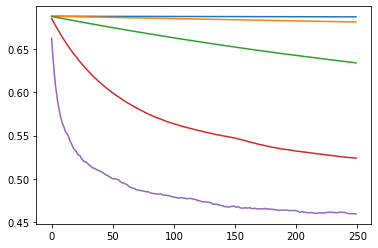

In [15]:
for clf in clfs:
    plt.plot(log_losses(clf, x_test, y_test))

In [16]:
clf.score(x_test, y_test)

0.7976031957390146

<h1>Trainig Random forest with optimal value of n_estimators

In [17]:
frst = RandomForestClassifier(n_jobs=-1, n_estimators=247, random_state=241).fit(x_train, y_train)

In [18]:
log_loss(y_test, frst.predict_proba(x_test))

0.45622029928195185

In [20]:
frst.score(x_test, y_test)

0.7989347536617842